**Libraries uploading:**

In [ ]:
import requests
!pip install fake_useragent
from fake_useragent import UserAgent
import json
import numpy as np
import pandas as pd
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.0 MB/s eta 0:00:00


**Fake user agent, and ID of parties if needed:**

In [ ]:
def ua():
    return(UserAgent().random)
headers = {'User-Agent': ua()}
#party_id_dict = {'72100024': 'Единая Россия',
#                '72100027' : 'Справедливая Россия',
#                '72100005' : 'ЛДПР',
#                '72100004' : 'КПРФ',
#                '72100029': 'неизвестно',
#                '-' : 'другие'}

**Web Scraping from** https://duma.dekoder.org/stenogrammy/ **and data base creating**

For only one word:

In [ ]:
word = 'экология' #'ecology' in Russian

z = requests.get('https://stateduma.api.dekoder.org/term/ru/' + word, headers = headers)
z1 = z.json()
df = pd.DataFrame({'Date' : [int(i) for i in list(z1['frequencies'].keys())],
                   'count' : [z1['frequencies'][i]['count'] for i in list(z1['frequencies'].keys())],
                   'frequencies' : [z1['frequencies'][i]['freq'] for i in list(z1['frequencies'].keys())],
                  } )
df.set_index('Date', inplace = True)
print(df.head(3))

      count  frequencies
Date                    
1994    169     8.064608
1995     97     6.925618
1996     94     5.730764


For different words:

In [ ]:
#Russian words mentioned during deliberations in the State Duma and associated with environmental issues:
words = ('экология', 'климат', 'климатический', 'экологическая безопасность', 'экологическая проблема', 'экологически чистый',
           'загрязнение', 'экосистема', 'окружающая среда', 'биоресурсы', 'озоновый', 'вырубка лес', 'отходы',
           'мусор', 'мусорный', 'мусороперерабатывающий', 'мусоросжигательный', 'мусоропереработка', 'свалка', 'техногенный',
           'киотский', 'радиоактивный', 'шиес', 'парниковый', 'примесь', 'тбо', 'водоохранный', 'парижское соглашение', 'сточная вода',
           'лесной пожар', 'питьевая вода', 'радиация', 'чернобыль', 'фукусим', 'ядерный отходы'
         )

eco_df = pd.DataFrame({'Date' : [int(i) for i in list(z1['frequencies'].keys())]})
eco_df.set_index('Date', inplace = True)
for j in words:
    z = requests.get('https://stateduma.api.dekoder.org/term/ru/' + j)#, headers = headers)
    z1 = z.json()
    df = pd.DataFrame({'Date' : [int(i) for i in list(z1['frequencies'].keys())],
                       j : [z1['frequencies'][i]['count'] for i in list(z1['frequencies'].keys())]}
                      )
    df.set_index('Date', inplace = True)
    eco_df = pd.concat([eco_df, df], axis=1)
    del df
eco_df = eco_df.fillna(0)
eco_df['total'] = eco_df.sum(axis=1)
print(eco_df.iloc[0:3,-6:])
#eco_df.to_excel("eco_duma.xlsx")

      питьевая вода  радиация  чернобыль  фукусим  ядерный отходы  total
Date                                                                    
1994              3       4.0       18.0      0.0             5.0  711.0
1995              2       4.0       22.0      0.0             1.0  468.0
1996              5      12.0       15.0      0.0             0.0  317.0


**Total number of environmental concern mentions each year:**

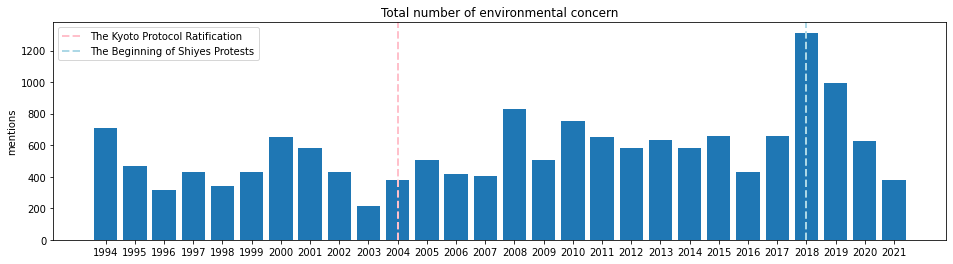

In [ ]:
plt.figure(figsize=(16,4))
plt.bar(x = eco_df.index, height=eco_df['total'])
plt.title('Total number of environmental concern')
plt.ylabel('mentions')
plt.xticks(np.arange(1994, 2022, 1))
plt.axvline(2004, color='pink', linestyle='--', lw=2, label='The Kyoto Protocol Ratification')
plt.axvline(2018, color='lightblue', linestyle='--', lw=2, label='The Beginning of Shiyes Protests')
plt.legend(loc='upper left')
plt.show()

**Word map of environmental concerns, 2014-2021**

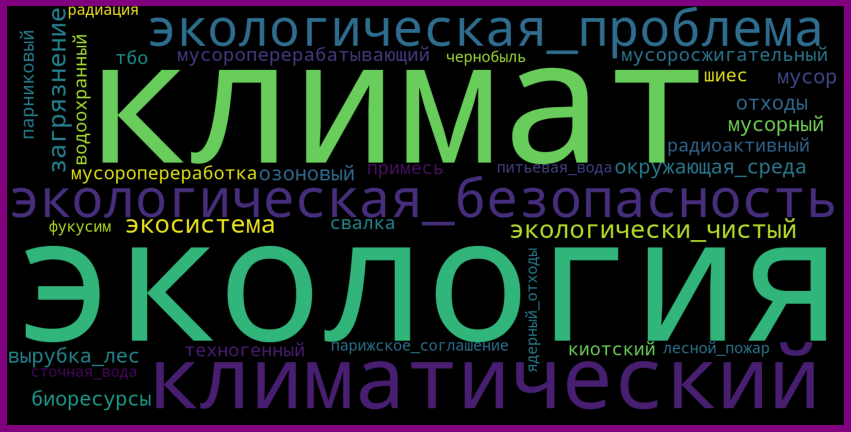

In [ ]:
eco_sum = pd.DataFrame(eco_df.iloc[:,:-1].sum(axis=0))
eco_sum.columns = ['total']

#Phrases as a single word:
for el in eco_sum.index:
  new_word = el.replace(' ', '_')
  eco_sum = eco_sum.rename(index={el: new_word})

text = eco_sum.to_string(header=None)
wordcloud = WordCloud(width=1600, height=800).generate(str(text))
plt.figure(figsize=(15,10), facecolor='purple')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()